# Chapter 5. Statistics

Statistics refers to the mathematics and techniques with which we understand data.

In [55]:
from __future__ import division
from collections import Counter
import math
from matplotlib import pyplot as plt

# https://jupyter-notebook.readthedocs.io/en/latest/examples/Notebook/Importing%20Notebooks.html
# These functions are from Chapter 4
def dot(v, w):
    """ v_1 * w_1 + ... + v_n * w_n """
    return sum(v_i * w_i for v_i, w_i in zip(v, w))

def sum_of_squares(v):
    """ v_1 * v_1 + ... + v_n * v_n """
    return dot(v, v)

## Describing a Single Set of Data

Getting back to the Data-Sciencester example from Chapter 1, let's use statistics to distill and communicate relevant features of our data.

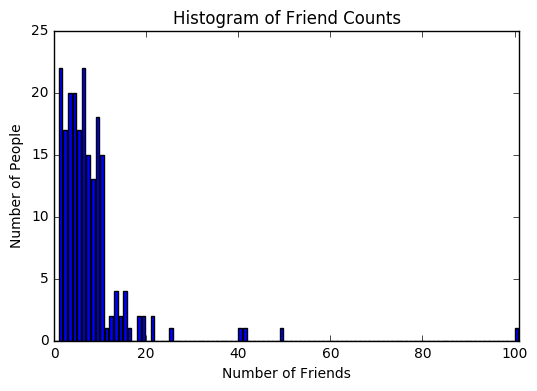

In [56]:
# put the friend counts into a histogram using Counter and plt.bar()

num_friends = [100,49,41,40,25,21,21,19,19,18,18,16,15,15,15,15,14,14,13,13,13,13,12,12,11,10,10,10,10,10,10,10,10,
               10,10,10,10,10,10,10,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,8,8,8,8,8,8,8,8,8,8,8,8,8,7,7,7,7,7,7,7,7,
               7,7,7,7,7,7,7,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,4,4,4,
               4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,2,2,2,2,2,2,2,2,2,2,2,2,
               2,2,2,2,2,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1]
friend_counts = Counter(num_friends)
xs = range(101)  # largest value is 100 
ys = [friend_counts[x] for x in xs]  # height is the number of friends 
plt.bar(xs, ys)
plt.axis([0, 101, 0, 25])
plt.title("Histogram of Friend Counts")
plt.xlabel("Number of Friends")
plt.ylabel("Number of People")
plt.show()

Nice chart, but not very useful for an elevator pitch.  
Let's start generating some statistics:

In [57]:
# Probably the simplest statistic is the number of data points
num_points = len(num_friends)
num_points

204

In [58]:
# Let's throw in the largest and smallest values:
largest_value = max(num_friends)
print(largest_value)
smallest_value = min(num_friends)
print(smallest_value)
print
# which are just special cases of wanting to know the values in specific positions:
sorted_values = sorted(num_friends)
smallest_value = sorted_values[0]
print(smallest_value)
second_smallest_value = sorted_values[1]
print(second_smallest_value)
second_largest_value = sorted_values[-2]
print(second_largest_value)

100
1

1
1
49


## Central Tendencies

We want some notion of where our data is centered.  
One common measure is mean (average), which is the sum of the data divided by its count:

In [59]:
def mean(x):
    return sum(x) / len(x)

mean(num_friends)

7.333333333333333

The median is the middle-most value if the number of data points is odd, or the average of the 2 middle-most values if the number of data points is even.

In [60]:
def median(v):
    """ finds the 'middle-most' value of v """
    n = len(v)
    sorted_v = sorted(v)
    midpoint = n // 2    
    if n % 2 == 1:
        # if odd, return the middle value
        return sorted_v[midpoint]
    else:
        # if even, return the average of the middle values
        lo = midpoint - 1
        hi = midpoint
        return (sorted_v[lo] + sorted_v[hi]) / 2
    
median(num_friends)

6.0

Even though mean is easier to compute, it is also more sensitive to outliers (like one person having 100 friends).

A generalization of the median is the quantile, which represents the value less than which a certain percentile of the data lies.

In [61]:
def quantile(x, p):
    """ returns the pth-percentile value in x """
    p_index = int(p * len(x))
    return sorted(x)[p_index]
 
print(quantile(num_friends, 0.10))
print(quantile(num_friends, 0.25))
print(quantile(num_friends, 0.50))
print(quantile(num_friends, 0.75))
print(quantile(num_friends, 0.90))

1
3
6
9
13


Mode is the most common value occurring in the data.

In [62]:
def mode(x):
    """ returns a list, might be more than one mode value """
    counts = Counter(x)
    max_count = max(counts.values())
    return [x_i for x_i, count in counts.iteritems() if count == max_count]  # if there is more than one mode

mode(num_friends)

[1, 6]

Mean is the central tendency metric we will use the most.

## Dispersion

Dispersion refers to measures of how spread out our data is.  
Typically they are statistics for which larger values mean more widely spread out and smaller values mean more closely grouped together. 

Range is the difference between the largest and smallest elements.

In [63]:
# 'range' already means something in Python, so let's use a different name
def data_range(x):
    return max(x) - min(x)

data_range(num_friends)

99

Variance measures how far a set of numbers are spread out from their mean.  
More specifically, the variance of a random variable X is the expected value of the squared deviation from the mean of  X.  

$\operatorname {Var} (X)=\operatorname {E} \left[(X-\mu )^{2}\right]$

In [64]:
def de_mean(x):
    """ translate x by subtracting its mean so that the result has a mean of zero """
    x_bar = mean(x)
    return [x_i - x_bar for x_i in x]

def variance(x):
    """ assumes x has at least two elements """
    n = len(x)
    deviations = de_mean(x)
    # https://en.wikipedia.org/wiki/Unbiased_estimation_of_standard_deviation
    return sum_of_squares(deviations) / (n - 1)

variance(num_friends)

81.54351395730716

Keep in mind that when measuring variance, the units are <em>squares</em> of the original units.  
As it can be hard to make sense of these, we often look instead at the standard deviation.

In [65]:
def standard_deviation(x):
    return math.sqrt(variance(x))

standard_deviation(num_friends)

9.03014473623248

Both the range and the standard deviation have the same outlier problem that afflicts mean.  
A more robust alternative is the interquartile range, which computes the difference between the 25th and 75th percentiles.

In [66]:
def interquartile_range(x):
    return quantile(x, 0.75) - quantile(x, 0.25)

interquartile_range(num_friends)

6

## Correlation

Correlation is a statistical relationship, causal or not, between variables or datasets.  
You have been tasked with investigating the relationship between DataSciencester's users' number of friends and the amount of time spent on the site.  

In [67]:
daily_minutes = [1,68.77,51.25,52.08,38.36,44.54,57.13,51.4,41.42,31.22,34.76,54.01,38.79,47.59,49.1,27.66,41.03,
                 36.73,48.65,28.12,46.62,35.57,32.98,35,26.07,23.77,39.73,40.57,31.65,31.21,36.32,20.45,21.93,26.02,
                 27.34,23.49,46.94,30.5,33.8,24.23,21.4,27.94,32.24,40.57,25.07,19.42,22.39,18.42,46.96,23.72,26.41,
                 26.97,36.76,40.32,35.02,29.47,30.2,31,38.11,38.18,36.31,21.03,30.86,36.07,28.66,29.08,37.28,15.28,
                 24.17,22.31,30.17,25.53,19.85,35.37,44.6,17.23,13.47,26.33,35.02,32.09,24.81,19.33,28.77,24.26,
                 31.98,25.73,24.86,16.28,34.51,15.23,39.72,40.8,26.06,35.76,34.76,16.13,44.04,18.03,19.65,32.62,
                 35.59,39.43,14.18,35.24,40.13,41.82,35.45,36.07,43.67,24.61,20.9,21.9,18.79,27.61,27.21,26.61,29.77,
                 20.59,27.53,13.82,33.2,25,33.1,36.65,18.63,14.87,22.2,36.81,25.53,24.62,26.25,18.21,28.08,19.42,
                 29.79,32.8,35.99,28.32,27.79,35.88,29.06,36.28,14.1,36.63,37.49,26.9,18.58,38.48,24.48,18.95,33.55,
                 14.24,29.04,32.51,25.63,22.22,19,32.73,15.16,13.9,27.2,32.01,29.27,33,13.74,20.42,27.32,18.23,35.35,
                 28.48,9.08,24.62,20.12,35.26,19.92,31.02,16.49,12.16,30.7,31.22,34.65,13.13,27.51,33.2,31.57,14.1,
                 33.42,17.44,10.12,24.42,9.82,23.39,30.93,15.03,21.67,31.09,33.29,22.61,26.89,23.48,8.38,27.81,32.35,
                 23.84]

Covariance is the paired analogue of variance.  
Whereas variance measures how a single variable deviates form its mean, covariance measures how two variables vary in tandem from their means.

In [68]:
def covariance(x,y):
    """
    dot sums up the products of corresponding pairs of elements
    When the corresponding elements of x and y are either both above their means or both below their means,
    a positive number enters the sum.
    When one is above its mean and the other below, a negative number enters the sum.
    A greater positive covariance means that x tends to be large when y is large and small when y is small.
    A greater negative covariance means that x tends to be small when y is large and large when y is small.
    A covariance close to zero means that no such rlationship exists.
    """
    n = len(x)
    return dot(de_mean(x), de_mean(y)) / (n - 1)

covariance(num_friends, daily_minutes)

22.425435139573064

Covariance can be difficult to interpret, so it is more common to look at correlation.  
Correlation divides out the standard deviation of both variables.

In [69]:
def correlation(x, y):
    """
    correlation is unitless and always lies between 1 (perfect correlation) and -1 (perfect anti-correlation)
    correlation of 0 means there is no correlation between x and y
    """
    stdev_x = standard_deviation(x)
    stdev_y = standard_deviation(y)
    if stdev_x > 0 and stdev_y > 0:
        return covariance(x, y) / stdev_x / stdev_y
    else:
        return 0  # if no variation, correlation is zero
    
correlation(num_friends, daily_minutes)

0.24736957366478218

We have a number, 0.25, which indicates a fairly weak positive correlation.  
Let's plot our data to see what else we can find out.

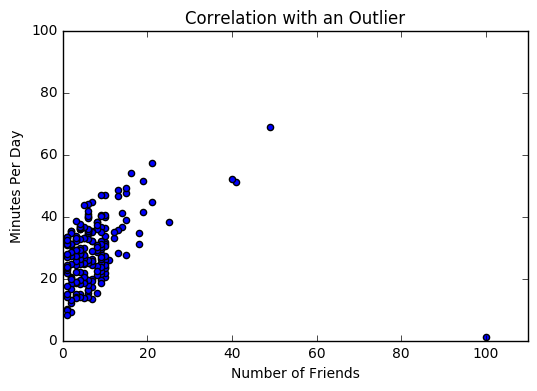

In [70]:
plt.scatter(num_friends, daily_minutes)
plt.axis([0, 110, 0, 100])
plt.title("Correlation with an Outlier")
plt.xlabel("Number of Friends")
plt.ylabel("Minutes Per Day")
plt.show()

The person with 100 friends who only spends one minute per day on the site skews the results.  
What happens if we ignore this user?

In [71]:
outlier = num_friends.index(100)  # index of outlier
num_friends_good = [x for i, x in enumerate(num_friends) if i != outlier]
daily_minutes_good = [x for i, x in enumerate(daily_minutes) if i != outlier]

correlation(num_friends_good, daily_minutes_good)

0.5736792115665573

Without the outlier, there is a much stronger positive correlation.  
Let's plot the results, excluding the outlier.

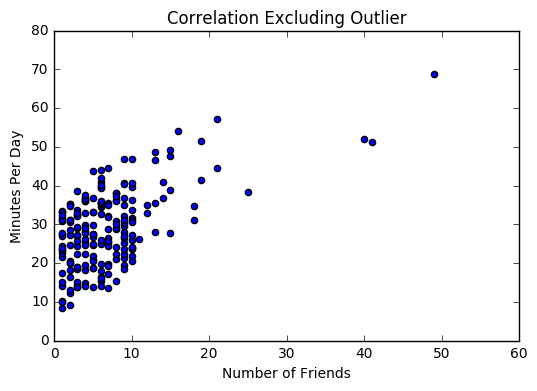

In [72]:
plt.scatter(num_friends_good, daily_minutes_good)
plt.axis([0, 60, 0, 80])
plt.title("Correlation Excluding Outlier")
plt.xlabel("Number of Friends")
plt.ylabel("Minutes Per Day")
plt.show()

## Simpson's Paradox